In [1]:
import pyuvdata
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/Users/ruby/Astro/LWA_pyuvsim_simulations'
uv_10s_center_time = pyuvdata.UVData()
uv_10s_center_time.read_uvfits(f'{path}/OVRO-LWA_100ms_sim_center_time.uvfits')
uv_10s_unphased = pyuvdata.UVData()
uv_10s_unphased.read_uvfits(f'{path}/OVRO-LWA_100ms_sim_unphased.uvfits')
uv_10s_phased = pyuvdata.UVData()
uv_10s_phased.read_uvfits(f'{path}/OVRO-LWA_100ms_sim_phased.uvfits')

uv_1h_center_time = pyuvdata.UVData()
uv_1h_center_time.read_uvfits(f'{path}/OVRO-LWA_1h_sim_center_time.uvfits')
uv_1h_unphased = pyuvdata.UVData()
uv_1h_unphased.read_uvfits(f'{path}/OVRO-LWA_1h_sim_unphased.uvfits')
uv_1h_phased = pyuvdata.UVData()
uv_1h_phased.read_uvfits(f'{path}/OVRO-LWA_1h_sim_phased.uvfits')

Fixing auto-correlations to be be real-only, after some imaginary values were detected in data_array.
Fixing auto-correlations to be be real-only, after some imaginary values were detected in data_array.
Fixing auto-correlations to be be real-only, after some imaginary values were detected in data_array.
Fixing auto-correlations to be be real-only, after some imaginary values were detected in data_array.
Fixing auto-correlations to be be real-only, after some imaginary values were detected in data_array.
Fixing auto-correlations to be be real-only, after some imaginary values were detected in data_array.


In [3]:
nbins = 50
bin_edges = np.linspace(0, 2400, num=nbins+1)

In [4]:
def histogram_bls(uv, bin_edges):
    nbins = len(bin_edges)-1
    avg_amps = np.zeros(nbins, dtype=float)
    for bin_ind in range(nbins):
        bl_lengths = np.sqrt(np.sum(uv.uvw_array**2, axis=1))
        use_bls = np.intersect1d(np.where(bl_lengths>bin_edges[bin_ind])[0], np.where(bl_lengths<bin_edges[bin_ind+1])[0])
        if len(use_bls) > 0:
            avg_amps_val = np.mean(np.abs(uv.data_array[use_bls, :, :, :]))
            avg_amps[bin_ind] = avg_amps_val
    return avg_amps

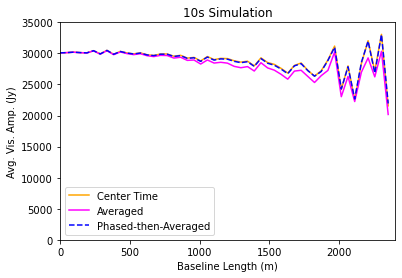

In [12]:
avg_amps_center = histogram_bls(uv_10s_center_time, bin_edges)
avg_amps_unphased = histogram_bls(uv_10s_unphased, bin_edges)
avg_amps_phased = histogram_bls(uv_10s_phased, bin_edges)

plt.plot(bin_edges[:-1], avg_amps_center, color='orange')
plt.plot(bin_edges[:-1], avg_amps_unphased, color='magenta')
plt.plot(bin_edges[:-1], avg_amps_phased, '--', color='blue')

plt.xlabel("Baseline Length (m)")
plt.ylabel("Avg. Vis. Amp. (Jy)")
plt.xlim([0,np.max(bin_edges)])
plt.ylim([0,35000])
plt.title("10s Simulation")
plt.legend(['Center Time','Averaged','Phased-then-Averaged'])
#plt.legend(['Center Time','Averaged'])
plt.savefig(f"{path}/10s_decorrelation_plot.png", dpi=400, facecolor='white')
plt.show()

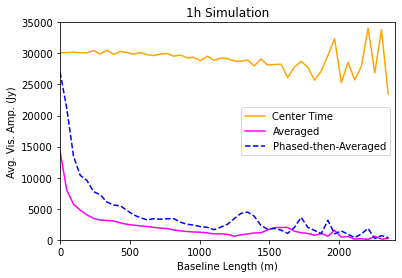

In [13]:
avg_amps_center = histogram_bls(uv_1h_center_time, bin_edges)
avg_amps_unphased = histogram_bls(uv_1h_unphased, bin_edges)
avg_amps_phased = histogram_bls(uv_1h_phased, bin_edges)

plt.plot(bin_edges[:-1], avg_amps_center, color='orange')
plt.plot(bin_edges[:-1], avg_amps_unphased, color='magenta')
plt.plot(bin_edges[:-1], avg_amps_phased, '--', color='blue')

plt.xlabel("Baseline Length (m)")
plt.ylabel("Avg. Vis. Amp. (Jy)")
plt.xlim([0,np.max(bin_edges)])
plt.ylim([0,35000])
plt.title("1h Simulation")
plt.legend(['Center Time','Averaged','Phased-then-Averaged'])
#plt.legend(['Center Time','Averaged'])
plt.savefig(f"{path}/1h_decorrelation_plot.png", dpi=400, facecolor='white', transparent=False)
plt.show()

In [7]:
print(path)

/Users/ruby/Astro/LWA_pyuvsim_simulations
